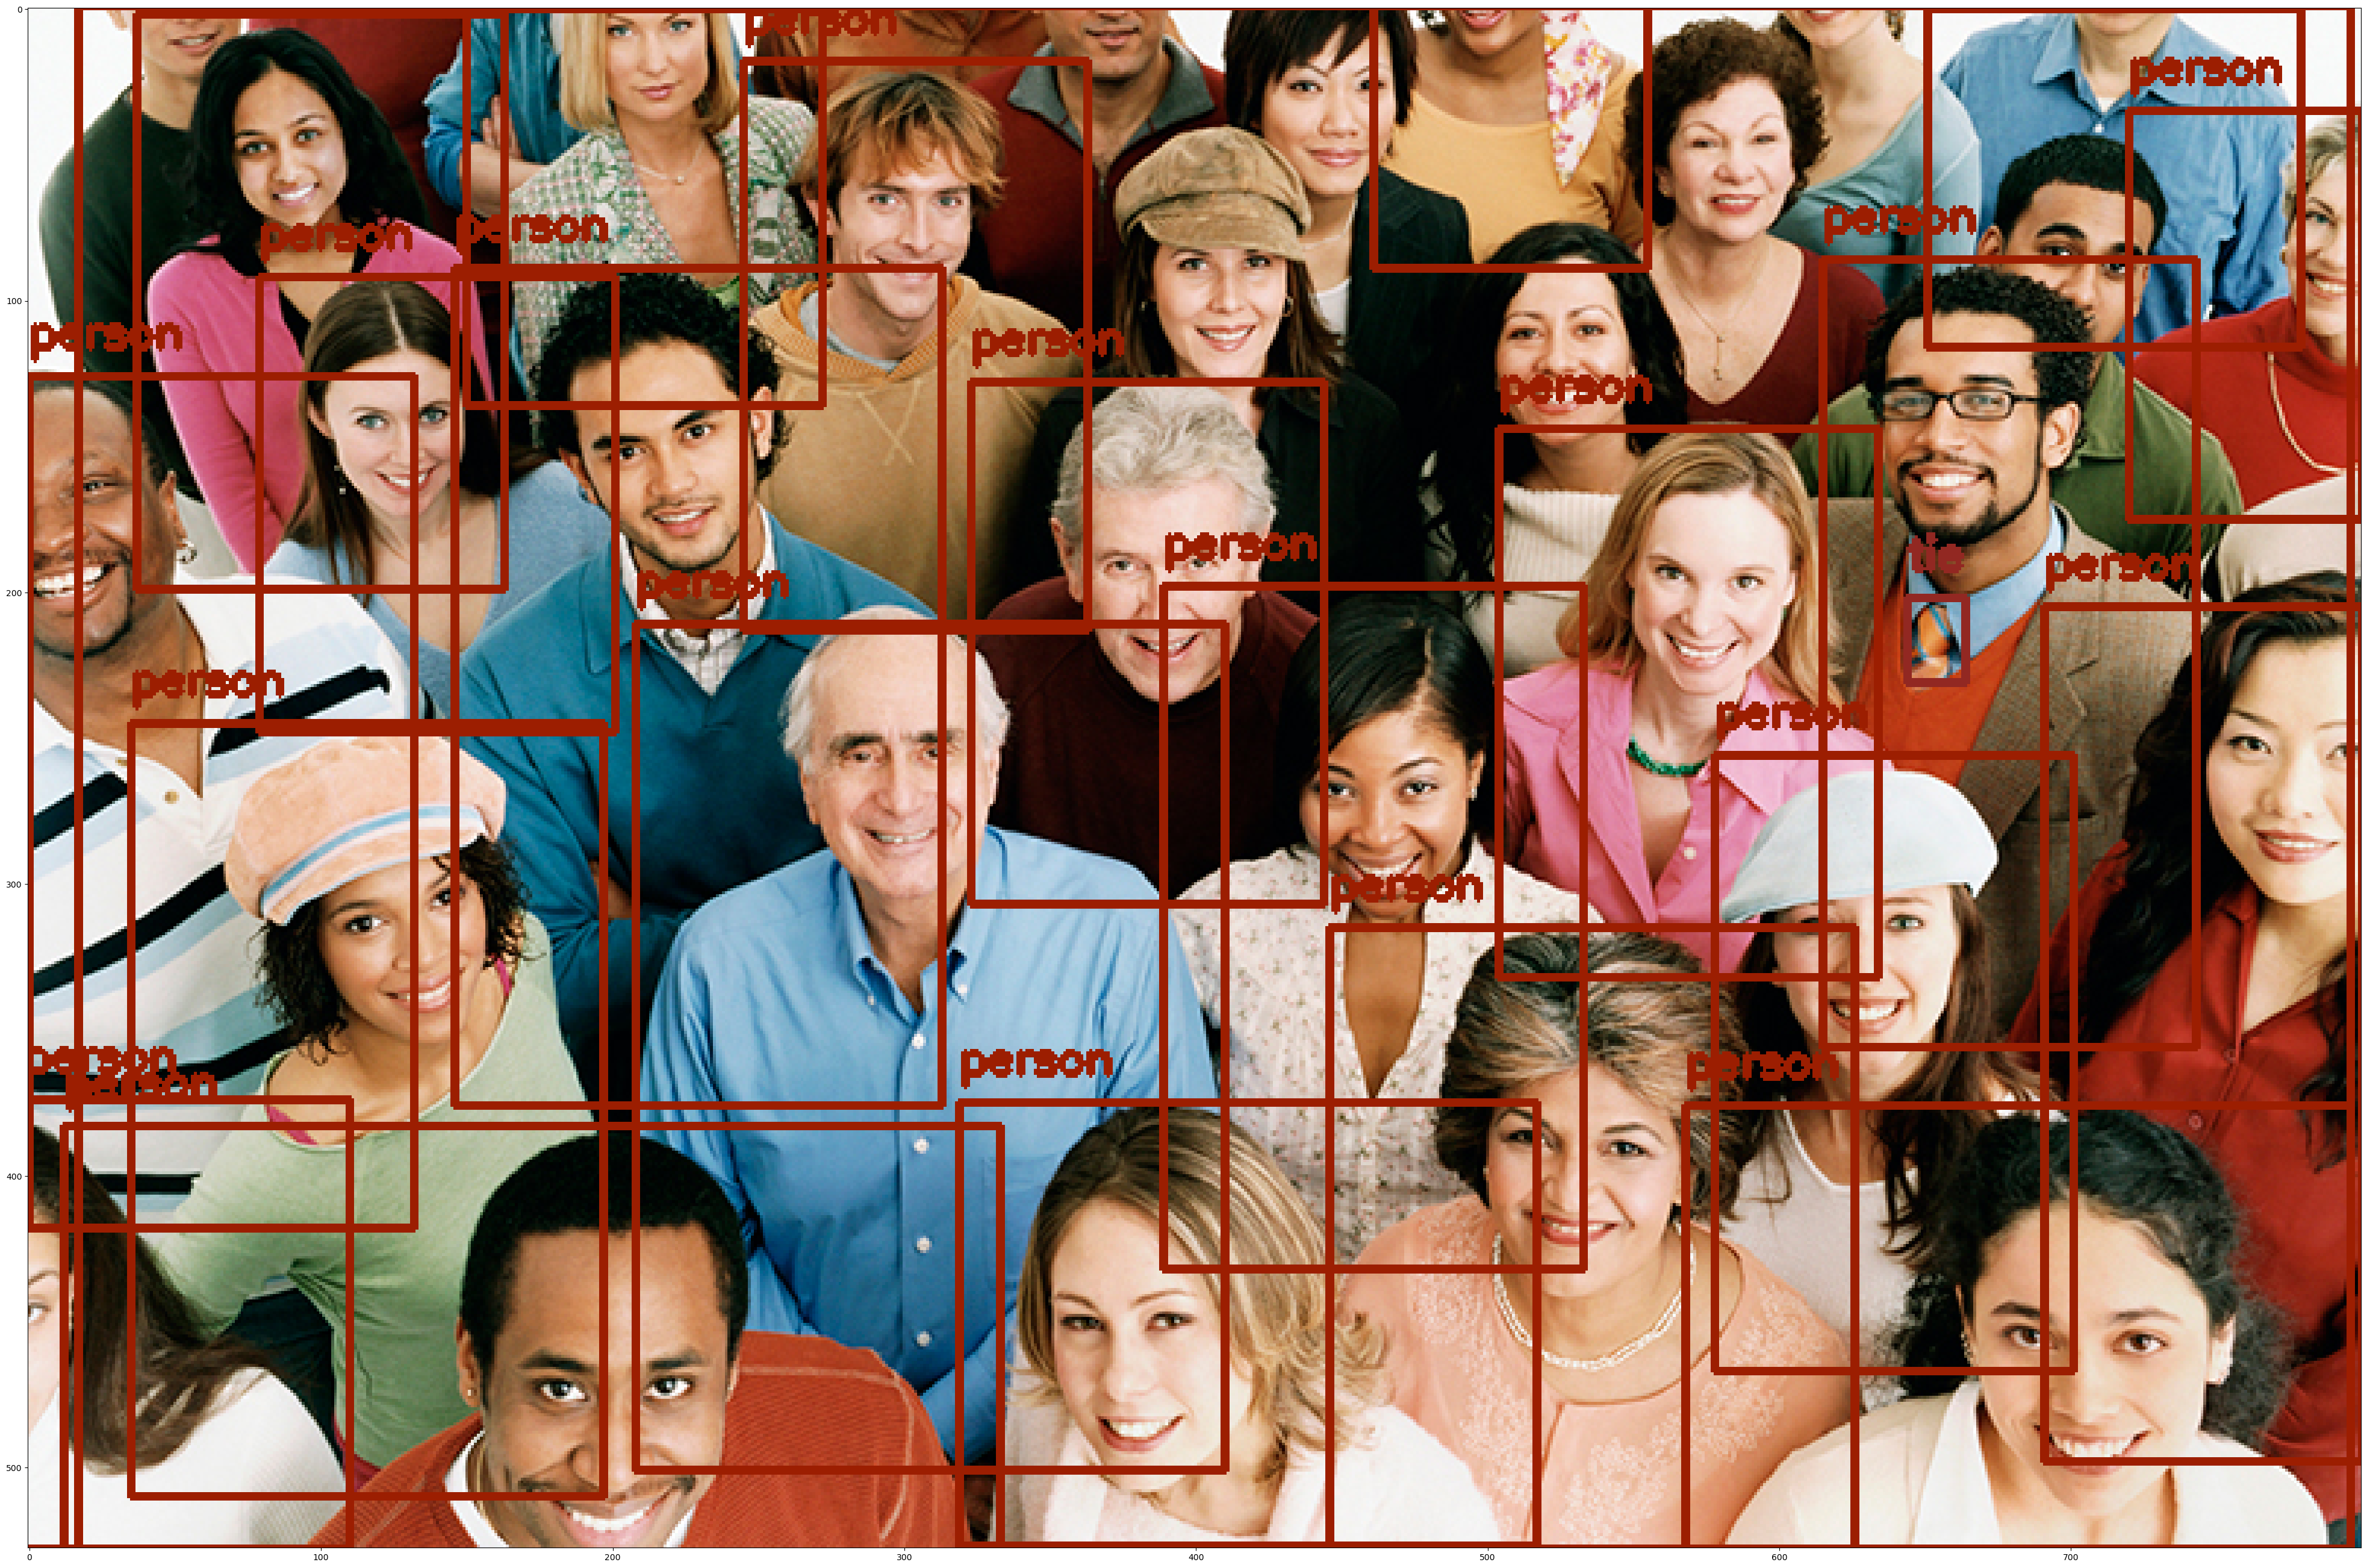

There are 24 objects/people in this image


In [ ]:
!pip install ipython
from ipywidgets import widgets
from IPython.display import display
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly
from keras.preprocessing import image
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import Image

#being able to upload the picture into juypter notebok
def upload_picture():
    # Open file dialog to select an image
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.png;*.jpg;*.jpeg; *.heic")])
    if file_path:
        # Define the destination directory path
        destination_directory = 'C:/Users/susma/Documents/Easy Detection/'

        # Copy the image to the destination directory
        image_name = file_path.split("/")[-1]
        destination_image_path = destination_directory + image_name
        #Being able to bring the images into the the object detection
        with open(file_path, 'rb') as source_image:
            with open(destination_image_path, 'wb') as destination_image:
                destination_image.write(source_image.read())

        # Display the uploaded image
        image = Image.open(destination_image_path)
        image.show()
        
        img= cv2.imread(destination_image_path)
        img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        #plt.figure(figsize=(25,25))
        #plt.axis('off')
        #plt.imshow(img1)
        #plt.show()
        
        #creating the object detection boxes around the images
        box, label, count = cv.detect_common_objects(img)
        output = draw_bbox(img, box, label, count)
        output = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
        
#         outputpic = tk.Tk()
#         outputpic.title('Object Counter pt.2')
#         image1 = Image.open(output)
#         test = ImageTk.PhotoImage(image1)
#         label1 = tkinter.Label(image=test)
#         label1.image = test
#         outputpic.mainloop()
        
        plt.figure(figsize=(50,50))
        plt.axis('on')
        plt.imshow(output)
        plt.show()
        print("There are " +str(len(label)) +" objects/people in this image")
    
        
#second attempt to creating bounding boxes around the diffent objects        
def object_detection_with_bounding_boxes(filename, model="yolov3", confidence=0.2):

    img = cv2.imread(filename)
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)
    print(f"========================\nImage processed: {filename}\n")
    
    
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c}\n")
    
   
    output_image = draw_bbox(img, bbox, label, conf)
    
   
    cv2.imwrite(f'images_with_boxes/{filename}', output_image)
    
    
    display(Image(f'images_with_boxes/{filename}'))
    
#Be able to make the tkinter gui
window = tk.Tk()
window.title('Object Counter in Picture')
window.geometry('600x350')
window.configure(bg='AliceBlue')

#title of the GUI
title = tk.Label(window, text="Welcome To My Object Counter!", height = 2, width = 50, font=('Modern', 15))
title.pack(pady=10)

# Main Statement being displayed
T = tk.Text(window, height = 7, width = 45, font=('Modern',15) )
T.pack()
Statement = "Hello my name is Smaran Alli and I have created an object counter that is able to count how many objects are in your image. Please upload a picture to get the program to work! The program will show you the picture that you uploaded and then will display the same picture with all of the objects (or people) detected and the total number of them found!"
T.insert(tk.END, Statement)

#Button being displayed to Upload the Picture
upload_button = tk.Button(window, text="Upload Picture",height = 3, width=45,font=('Arial',10), command=upload_picture)
upload_button.pack(pady=30)
upload_button.pack()




window.mainloop()





